In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import math


In [2]:
# Load the dataset
df = pd.read_csv('marketing_AB.csv')

# Check the first few rows of the dataset
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
# Check for missing values
print(df.isnull().sum())

# Data types check
print(df.dtypes)

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object


In [4]:
# Drop 'Unnamed: 0' if it's redundant
df = df.drop(columns=['Unnamed: 0'])

# Convert 'test group' to category
df['test group'] = df['test group'].astype('category')

# Check unique values in 'most ads day' to ensure it contains valid day names
print(df['most ads day'].unique())




['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']


In [5]:
# Calculate conversion rates for both groups
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)

# Total number of users in each group
total_users = df.groupby('test group')['converted'].count()
print(total_users)


test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64
test group
ad     564577
psa     23524
Name: converted, dtype: int64


In [6]:
from statsmodels.stats.proportion import proportions_ztest

    # Number of conversions in each group
    conversions = df.groupby('test group')['converted'].sum()

    # Total users in each group
    total_users = df.groupby('test group')['converted'].count()

    # Perform Z-test
    z_stat, p_value = proportions_ztest(conversions, total_users)

    print(f"Z-statistic: {z_stat}, P-value: {p_value}")



Z-statistic: 7.3700781265454145, P-value: 1.7052807161559727e-13


If the p-value is less than 0.05, reject the null hypothesis and conclude that the ad campaign had a statistically significant effect on conversions.
If the p-value is greater than 0.05, fail to reject the null hypothesis, meaning there is no statistically significant difference between the groups.

In [7]:
if p_value < 0.05:
    print("Reject the null hypothesis: The ad campaign had a significant impact on conversions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")
    


Reject the null hypothesis: The ad campaign had a significant impact on conversions.


In [8]:
import math

def cohens_h(p1, p2):
    return 2 * (math.asin(math.sqrt(p1)) - math.asin(math.sqrt(p2)))

# Conversion rates for ad and psa groups
p1 = conversions['ad'] / total_users['ad']  # Ad group conversion rate
p2 = conversions['psa'] / total_users['psa']  # PSA group conversion rate

# Calculate Cohen's h
effect_size = cohens_h(p1, p2)
print(f"Effect Size (Cohen's h): {effect_size}")


Effect Size (Cohen's h): 0.053002578606030915


C:\Users\Meet\AppData\Local\Temp\ipykernel_35748\3975163166.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test group', y='converted', data=df, ci=None)


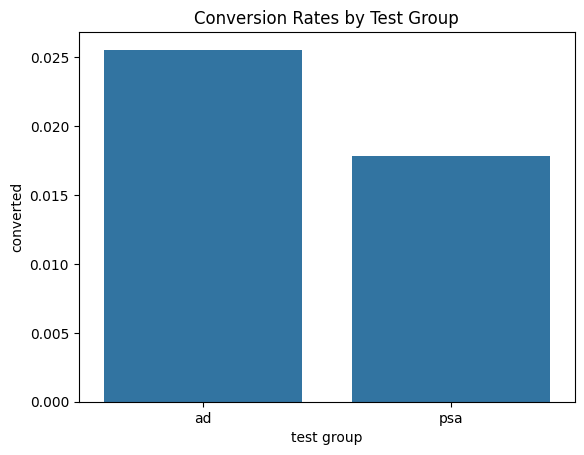

In [9]:
# Visualize conversion rates
sns.barplot(x='test group', y='converted', data=df, ci=None)
plt.title('Conversion Rates by Test Group')
plt.show()


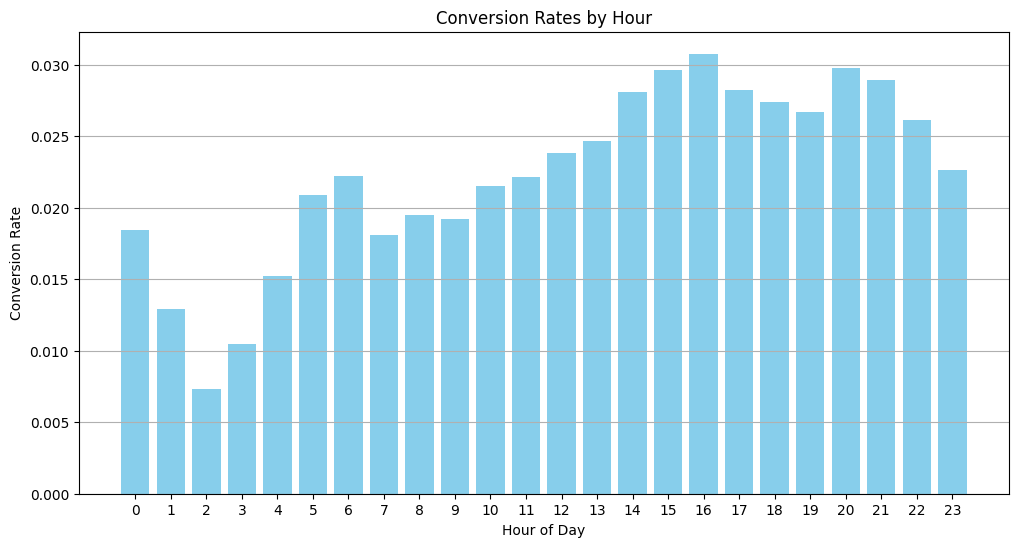

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by most ads hour and calculate conversion rates
hourly_conversion = df.groupby('most ads hour')['converted'].mean().reset_index()

# Rename columns for clarity
hourly_conversion.columns = ['Hour', 'Conversion Rate']

# Visualize the conversion rates by hour
plt.figure(figsize=(12, 6))
plt.bar(hourly_conversion['Hour'], hourly_conversion['Conversion Rate'], color='skyblue')
plt.title('Conversion Rates by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate')
plt.xticks(hourly_conversion['Hour'])
plt.grid(axis='y')
plt.show()


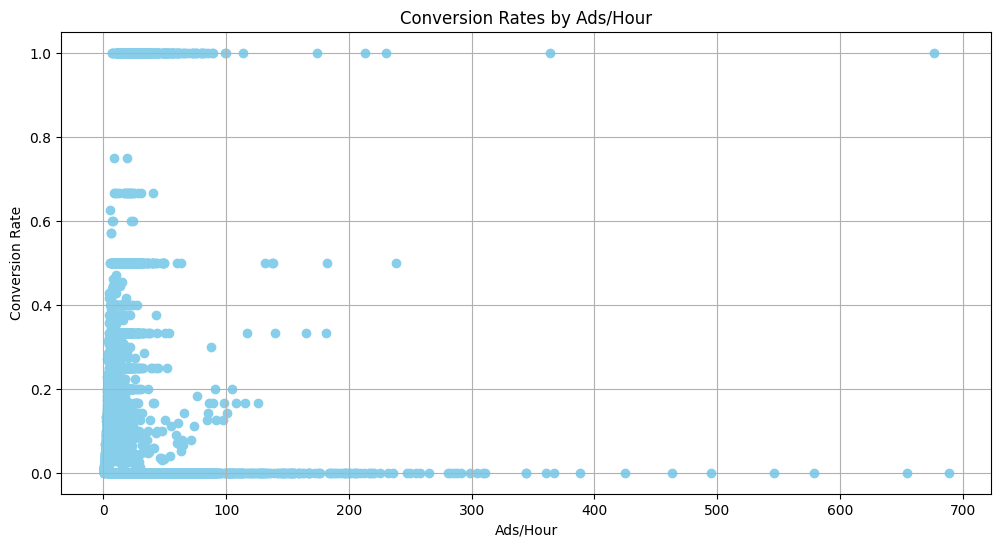

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Create a new column for ads per hour
df['ads_per_hour'] = df['total ads'] / df['most ads hour']

# Step 2: Group by ads_per_hour and calculate conversion rates
ads_conversion = df.groupby('ads_per_hour')['converted'].mean().reset_index()

# Step 3: Rename columns for clarity
ads_conversion.columns = ['Ads/Hour', 'Conversion Rate']

# Step 4: Visualize the conversion rates by ads/hour
plt.figure(figsize=(12, 6))
plt.scatter(ads_conversion['Ads/Hour'], ads_conversion['Conversion Rate'], color='skyblue')
plt.title('Conversion Rates by Ads/Hour')
plt.xlabel('Ads/Hour')
plt.ylabel('Conversion Rate')
plt.grid()
plt.show()


Correlation between total ads and conversion: 0.22


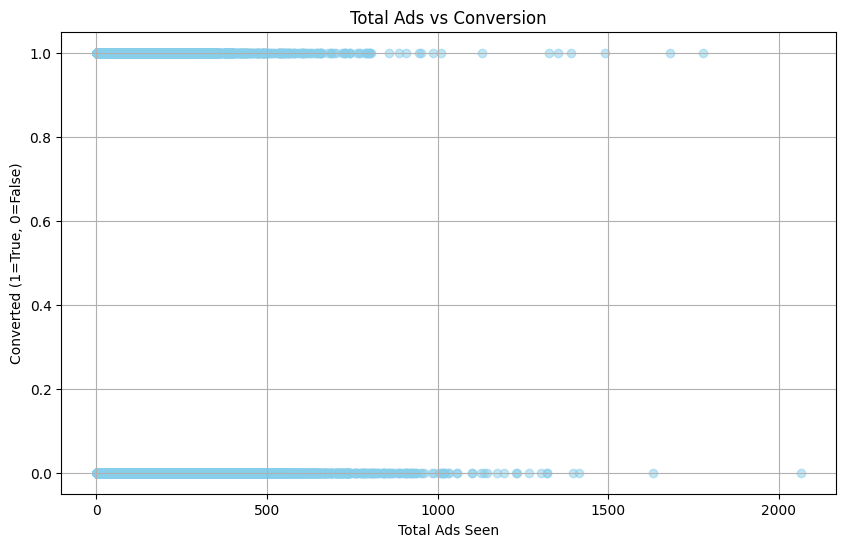

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate correlation
correlation = df['total ads'].corr(df['converted'].astype(int))  # Convert boolean to int for correlation calculation

print(f"Correlation between total ads and conversion: {correlation:.2f}")

# Step 2: Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['total ads'], df['converted'].astype(int), alpha=0.5, color='skyblue')
plt.title('Total Ads vs Conversion')
plt.xlabel('Total Ads Seen')
plt.ylabel('Converted (1=True, 0=False)')
plt.grid()
plt.show()
